In [1]:
import semicon

# load parameters as dataframe

In [2]:
semicon.parameters.load_params('winkler')

E_0  Delta_0       P     m_c     g_c  gamma_1  gamma_2  gamma_3  \
InAs  0.418    0.380  0.9197  0.0229 -14.900    20.40     8.30     9.10   
AlSb  2.384    0.673  0.8463  0.1200   0.843     4.15     1.01     1.71   
InSb  0.237    0.810  0.9641  0.0139 -51.560    37.10    16.50    17.70   
Ge      NaN    0.296     NaN     NaN     NaN    13.38     4.24     5.69   

      kappa     q  
InAs   7.60  0.39  
AlSb   0.31  0.07  
InSb  15.60  0.39  
Ge     3.41  0.06

In [3]:
semicon.parameters.load_params('lawaetz')

E_0  Delta_0       P    m_c    g_c  gamma_1  gamma_2  gamma_3  kappa  \
AlSb  2.30     0.75  0.8441  0.180   0.52     4.15     1.01     1.75   0.31   
GaSb  0.81     0.77  0.9238  0.045  -7.12    11.80     4.03     5.26   3.18   
InAs  0.42     0.38  0.9197  0.023 -14.80    19.67     8.37     9.29   7.68   

         q  
AlSb  0.07  
GaSb  0.13  
InAs  0.04

# bulk parameters

## original parametres show spurious solutions

In [4]:
semicon.parameters.bulk(
    bank='lawaetz',
    material='InAs',
)

{'Delta_0': 0.38,
 'E_0': 0.42,
 'E_v': 0.0,
 'P': 0.9197,
 'g_c': 1.9387298446743628,
 'gamma_0': -1.011521086016634,
 'gamma_1': 2.0502843740269903,
 'gamma_2': -0.4398578129865065,
 'gamma_3': 0.4801421870134934,
 'kappa': -1.129857812986506,
 'q': 0.04}

## that can be avoid by renormalizing $P$ in a way that $\gamma_0=1$

In [5]:
semicon.parameters.bulk(
    bank='lawaetz',
    material='InAs',
    new_gamma_0=1,
)

{'Delta_0': 0.38,
 'E_0': 0.42,
 'E_v': 0.0,
 'P': 0.89866827769558988,
 'g_c': 1.181919931123545,
 'gamma_0': 1,
 'gamma_1': 2.8469263882910063,
 'gamma_2': -0.04153680585449848,
 'gamma_3': 0.8784631941455014,
 'kappa': -0.731536805854498,
 'q': 0.04}

## One can also set $P$ to desire value

In [6]:
semicon.parameters.bulk(
    bank='lawaetz',
    material='InAs',
    new_P=0.89866827769558988,
)

{'Delta_0': 0.38,
 'E_0': 0.42,
 'E_v': 0.0,
 'P': 0.8986682776955899,
 'g_c': 1.181919931123545,
 'gamma_0': 1.0000000000000053,
 'gamma_1': 2.8469263882910063,
 'gamma_2': -0.04153680585449848,
 'gamma_3': 0.8784631941455014,
 'kappa': -0.731536805854498,
 'q': 0.04}

# 2DEG parameters

In [7]:
grid_spacing = 0.5
widths = [5, 12.5, 5, 5]
gamma_0 = 1.0

AlSb = semicon.parameters.bulk('lawaetz', 'AlSb', gamma_0, valence_band_offset=.18)
InAs = semicon.parameters.bulk('lawaetz', 'InAs', gamma_0)
GaSb = semicon.parameters.bulk('lawaetz', 'GaSb', gamma_0, valence_band_offset=.56)

two_deg_params, walls = semicon.parameters.two_deg(
    parameters = [AlSb, InAs, GaSb, AlSb],
    widths = widths,
    grid_spacing=grid_spacing,
    extra_constants={'hbar': 1, 'e': 1},
)

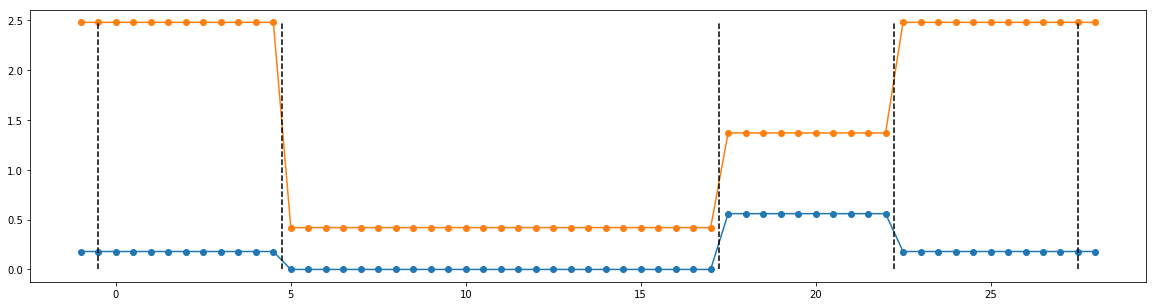

In [8]:
import numpy as np

xpos = np.arange(- 2 * grid_spacing, sum(widths) + 2 * grid_spacing, 0.5)
semicon.parameters.plot_2deg_bandedges(two_deg_params, xpos, walls)